In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import random

In [5]:
df = pd.read_csv('placements.csv')
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


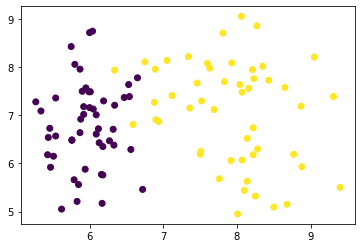

In [6]:
plt.scatter(df['cgpa'],df['resume_score'],c=df['placed'])

In [7]:
X=df[['cgpa','resume_score']]
y=df['placed']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [9]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [10]:
p.fit(X_train,y_train)

Perceptron()

In [11]:
y_pred=p.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.85

## Chalo Apna Perceptron Banate hain...

In [13]:
from sklearn.datasets import make_classification
import numpy as np

In [14]:
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

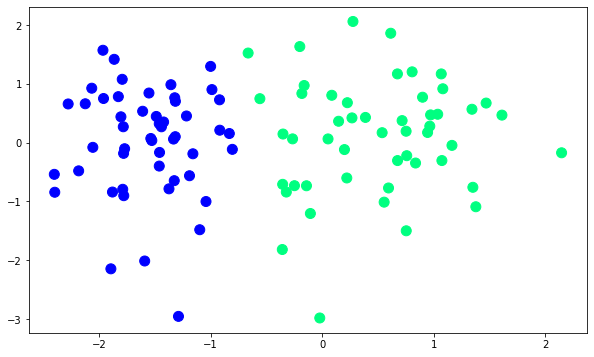

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [16]:
def step(z):
    return 1 if z>0 else 0

In [17]:
def perceptron(X,y):
    X=np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr=0.1
    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat=step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]

In [18]:
intercept_,coef_=perceptron(X,y)

In [19]:
coef_

array([1.32723036, 0.12649057])

In [20]:
intercept_

0.9

In [21]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [22]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input+b

(-3.0, 2.0)

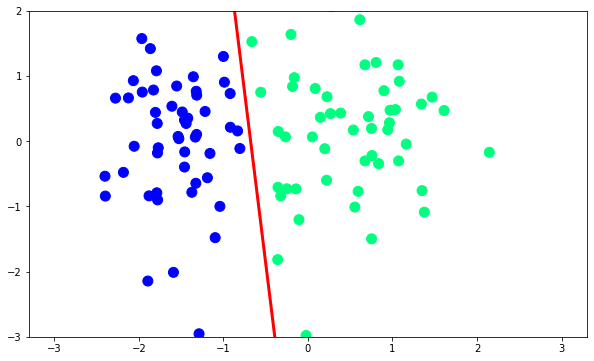

In [23]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

## Using Scikit-Learn

In [24]:
from sklearn.linear_model import Perceptron
p=Perceptron()

In [25]:
p.fit(X,y)

Perceptron()

In [26]:
p.coef_

array([[4.30310075, 0.18860799]])

In [27]:
p.intercept_

array([3.])

<AxesSubplot:>

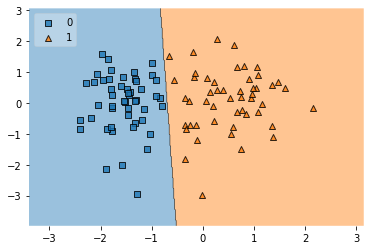

In [28]:
plot_decision_regions(X,y,clf=p,legend=2)

In [29]:
y_pred = p.predict(X)

In [60]:
accuracy_score(y,y_pred)

1.0

In [31]:
m = -(p.coef_[0][0]/p.coef_[0][1])
b = -(p.intercept_/p.coef_[0][1])

In [32]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1+b

(-3.0, 2.0)

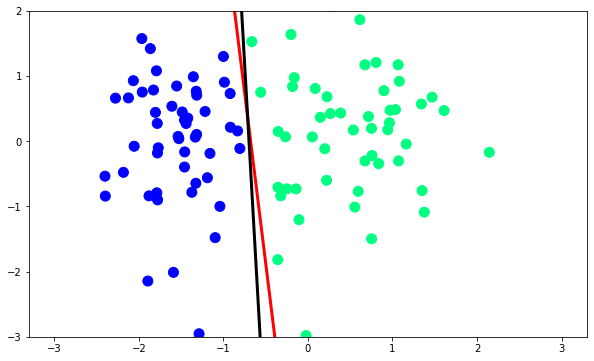

In [33]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)